In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib import rc
import pandas as pd
import os.path as path
import urllib.request

In [2]:
file = 'InterpolacionNewtonGregory.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = urllib.request.urlretrieve(url,file)
else:
    print('---File Found---')
    Path_ = file

---File Found---


In [3]:
Data = pd.read_csv(Path_, sep=',')

In [232]:
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [41]:
x_values = np.float64(Data['X'])
y_values = np.float64(Data['Y'])

In [241]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    h = X[1] - X[0]
           
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(Y)):
            
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
          
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*(h**(i)))
        
    return Sum_,np.round(Diff,2)

In [248]:
x = np.linspace(np.min(x_values), np.max(x_values), 100)
y,Diff = NewtonGregory(x_values, y_values, x)

In [249]:
Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

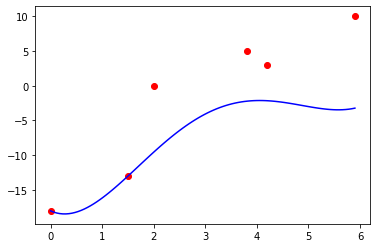

In [250]:
plt.scatter(x_values,y_values, color='red')
plt.plot(x,y, color='blue')

In [112]:
x = sym.Symbol('X',Real=True)
f, _ = NewtonGregory(x_values,y_values,x)

In [114]:
f = sym.simplify(f)
f

-0.00219478737997257*X**5 + 0.165157750342936*X**4 - 1.91458984910837*X**3 + 6.99914403292181*X**2 - 3.40385185185185*X - 18.0

In [107]:
Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])